<a href="https://colab.research.google.com/github/basmala875/Machine-Learning-Projects/blob/main/Clustering_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering - Mini-Project 3

***Edit this cell with your name(s), tutorial number and ID(s)***

---

Name:

ID:

Tutorial:

---

Name:

ID:

Tutorial:

---

Name:

ID:

Tutorial:

---


## Dataset Description

The dataset file contains almost ~3000 different music genres aggregated from more than 160.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)


Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)


**Recommended Reading for Data Understanding**: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**Acknowledgment**: This dataset was created and published by Yamaç Eren Ay on Kaggle.

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [90]:
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/music_genres.csv')
df.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
4,abstract,0.459210,0.516167,3.431965e+05,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1


# Dara Inspection/ Cleaning

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            2972 non-null   object 
 1   acousticness      2972 non-null   float64
 2   danceability      2972 non-null   float64
 3   duration_ms       2972 non-null   float64
 4   energy            2972 non-null   float64
 5   instrumentalness  2972 non-null   float64
 6   liveness          2972 non-null   float64
 7   loudness          2972 non-null   float64
 8   speechiness       2972 non-null   float64
 9   tempo             2972 non-null   float64
 10  valence           2972 non-null   float64
 11  popularity        2972 non-null   float64
 12  key               2972 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 302.0+ KB


In [92]:
df.isnull().sum()

,0
genres,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
liveness,0
loudness,0
speechiness,0
tempo,0


In [93]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,2972.000000,2972.000000,2.972000e+03,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000
mean,0.401157,0.537190,2.517272e+05,0.561190,0.211368,0.192791,-10.509249,0.083580,119.020796,0.492741,39.925598,5.938425
std,0.319781,0.150693,9.467215e+04,0.234511,0.267374,0.092370,5.370006,0.080495,17.471762,0.201853,16.747890,3.368621
min,0.000003,0.056900,3.094600e+04,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000
25%,0.119036,0.441169,2.063674e+05,0.395030,0.004829,0.137682,-12.428814,0.044900,109.191107,0.348558,32.531911,3.000000
50%,0.321706,0.546511,2.375479e+05,0.601264,0.080663,0.178752,-9.219409,0.059432,119.199333,0.499936,43.059365,7.000000
75%,0.674088,0.647536,2.773008e+05,0.730202,0.343333,0.220858,-6.919969,0.091000,127.510813,0.640380,51.139881,9.000000
max,0.996000,0.929000,2.382587e+06,0.994667,0.992000,0.960000,0.060000,0.946219,204.212000,0.980000,80.666667,11.000000


# EDA

**Q1: What factors affect the Popularity of the song? (Mention the two biggest factors, with interpretation)**

In [94]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('popularity')

popularity_correlations = df[numerical_cols].corrwith(df['popularity'])

print("Correlation with 'popularity' column:")
print(popularity_correlations)

Correlation with 'popularity' column:
acousticness       -0.458546
danceability        0.218019
duration_ms        -0.071111
energy              0.337657
instrumentalness   -0.265516
liveness           -0.094092
loudness            0.344315
speechiness        -0.045112
tempo               0.146617
valence             0.023117
key                 0.008700
dtype: float64



Calculate the correlation between the 'popularity' column and all other numerical features in the DataFrame to identify potential factors.


Top two features with highest absolute correlation with 'popularity':
['acousticness', 'loudness']


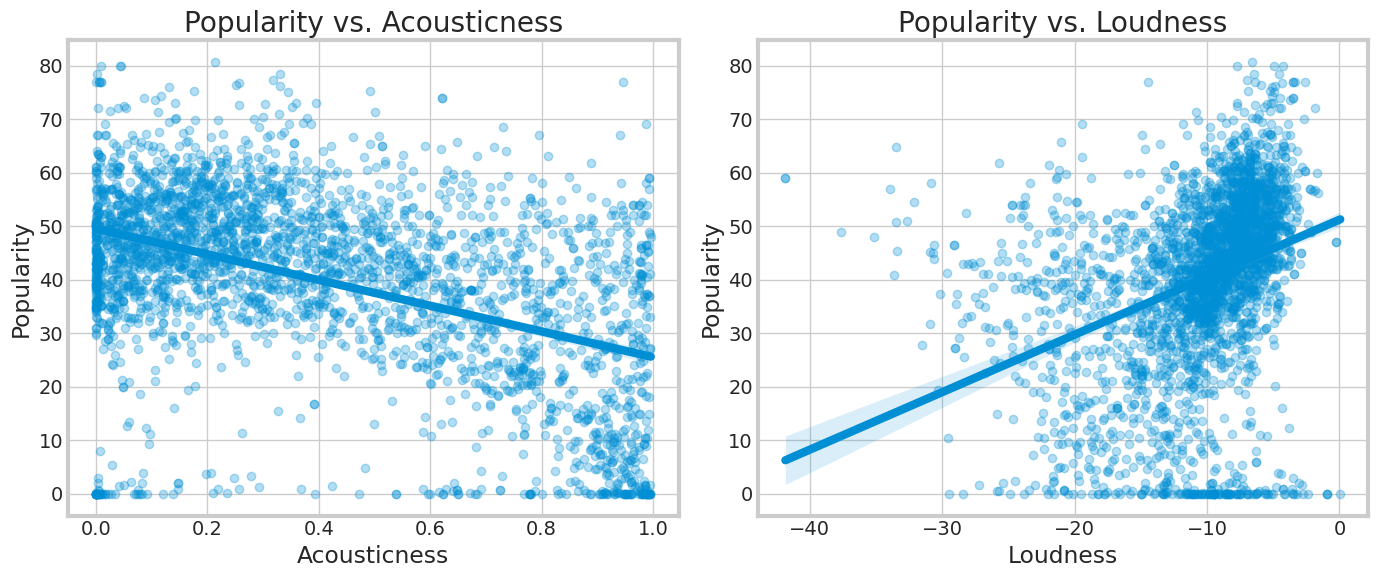

In [95]:
abs_popularity_correlations = popularity_correlations.abs().sort_values(ascending=False)

top_two_features = abs_popularity_correlations.head(2).index.tolist()

print("Top two features with highest absolute correlation with 'popularity':")
print(top_two_features)

plt.figure(figsize=(14, 6))

# Plot for the feature with the highest absolute correlation
plt.subplot(1, 2, 1)
sns.regplot(x=df[top_two_features[0]], y=df['popularity'], scatter_kws={'alpha':0.3})
plt.title(f'Popularity vs. {top_two_features[0].capitalize()}')
plt.xlabel(top_two_features[0].capitalize())
plt.ylabel('Popularity')

# Plot for the feature with the second highest absolute correlation
plt.subplot(1, 2, 2)
sns.regplot(x=df[top_two_features[1]], y=df['popularity'], scatter_kws={'alpha':0.3})
plt.title(f'Popularity vs. {top_two_features[1].capitalize()}')
plt.xlabel(top_two_features[1].capitalize())
plt.ylabel('Popularity')

plt.tight_layout()
plt.show()

### Interpretation of Top Factors Affecting Song Popularity

**1. Acousticness and Popularity:**

*   **Correlation Value:** The correlation between 'acousticness' and 'popularity' is approximately -0.458. This indicates a moderate negative correlation.
*   **Nature of Relationship:** A negative correlation suggests that as the acousticness of a song increases, its popularity tends to decrease. Conversely, songs with lower acousticness (often implying more electronic or amplified sounds) tend to be more popular.
*   **Strength:** The absolute value of the correlation (0.458) indicates a moderate strength in this inverse relationship. The scatter plot for 'Popularity vs. Acousticness' visually confirms this downward trend, though with significant spread, suggesting other factors also play a role.

**2. Loudness and Popularity:**

*   **Correlation Value:** The correlation between 'loudness' and 'popularity' is approximately 0.344. This indicates a moderate positive correlation.
*   **Nature of Relationship:** A positive correlation implies that as the loudness of a song increases, its popularity tends to increase. This suggests that louder songs might generally be perceived as more impactful or engaging, leading to higher popularity.
*   **Strength:** The absolute value of the correlation (0.344) indicates a moderate strength in this direct relationship. The scatter plot for 'Popularity vs. Loudness' shows an upward trend, again with a notable spread, indicating that while loudness is a factor, it's not the sole determinant of popularity.

**Summary:**

In summary, based on this analysis, songs that are less acoustic (more amplified/electronic) and louder tend to be moderately more popular. 'Acousticness' has a more pronounced (negative) impact compared to 'loudness' (positive) in terms of correlation strength. While these factors show significant relationships with popularity, the spread in the scatter plots indicates that popularity is a complex phenomenon influenced by many other variables beyond these two.

**Q2: Which genre is the most popular and which is the least?**

In [96]:
genre_popularity = df.groupby('genres')['popularity'].mean().sort_values(ascending=False)

most_popular_genre = genre_popularity.index[0]
least_popular_genre = genre_popularity.index[-1]

print(f"The most popular genre is: {most_popular_genre} (Average Popularity: {genre_popularity.iloc[0]:.2f})")
print(f"The least popular genre is: {least_popular_genre} (Average Popularity: {genre_popularity.iloc[-1]:.2f})")


The most popular genre is: basshall (Average Popularity: 80.67)
The least popular genre is: zambian pop (Average Popularity: 0.00)


/tmp/ipython-input-160572657.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Average Popularity', data=genre_min_max_popularity, palette='viridis')


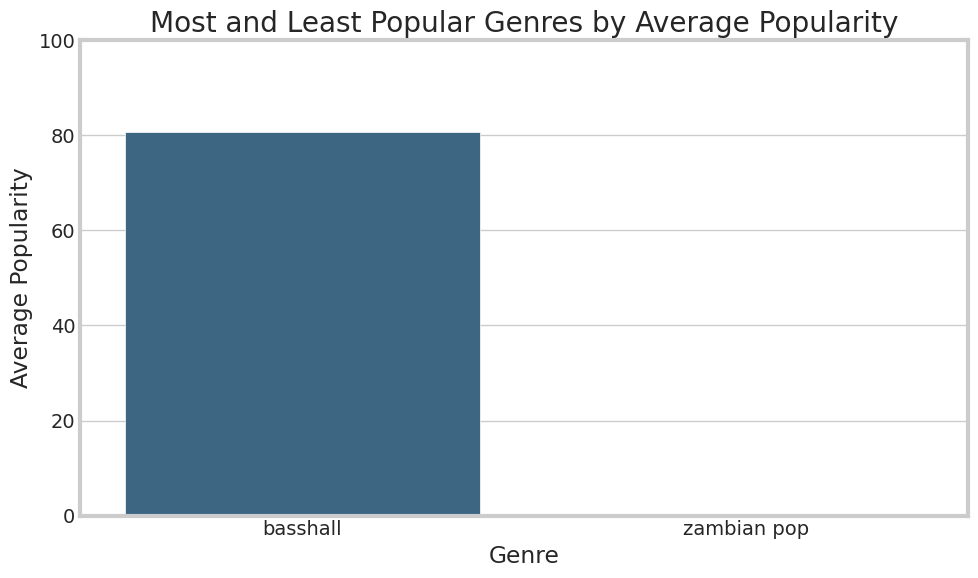

In [97]:
import pandas as pd

# Create a DataFrame for the most and least popular genres
genre_min_max_popularity = pd.DataFrame({
    'Genre': [most_popular_genre, least_popular_genre],
    'Average Popularity': [genre_popularity.iloc[0], genre_popularity.iloc[-1]]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y='Average Popularity', data=genre_min_max_popularity, palette='viridis')
plt.title('Most and Least Popular Genres by Average Popularity')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.ylim(0, 100) # Popularity ranges from 0 to 100
plt.tight_layout()
plt.show()

**Q3:** What are the most correlated pairs of attributes? (Mention 2 pairs, with interpretation)
**bold text**

In [98]:
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
print("Correlation Matrix of Numerical Features:")
print(correlation_matrix)

Correlation Matrix of Numerical Features:
                  acousticness  danceability  duration_ms    energy  \
acousticness          1.000000     -0.325010    -0.014024 -0.868257   
danceability         -0.325010      1.000000    -0.160638  0.299788   
duration_ms          -0.014024     -0.160638     1.000000 -0.048202   
energy               -0.868257      0.299788    -0.048202  1.000000   
instrumentalness      0.273774     -0.383103     0.229421 -0.324964   
liveness             -0.076653     -0.055143     0.018643  0.168303   
loudness             -0.737279      0.453064    -0.137600  0.848966   
speechiness          -0.086229      0.242061     0.033247  0.119862   
tempo                -0.397669      0.082864    -0.046865  0.430789   
valence              -0.178256      0.652549    -0.257512  0.305207   
popularity           -0.458546      0.218019    -0.071111  0.337657   
key                  -0.078907      0.029557    -0.029289  0.097237   

                  instrumentalness


we calculate the correlation matrix for all numerical features in the DataFrame to understand the relationships between different attributes.



Top 2 Most Correlated Pairs (absolute value):
energy    acousticness   -0.868257
loudness  energy          0.848966
dtype: float64


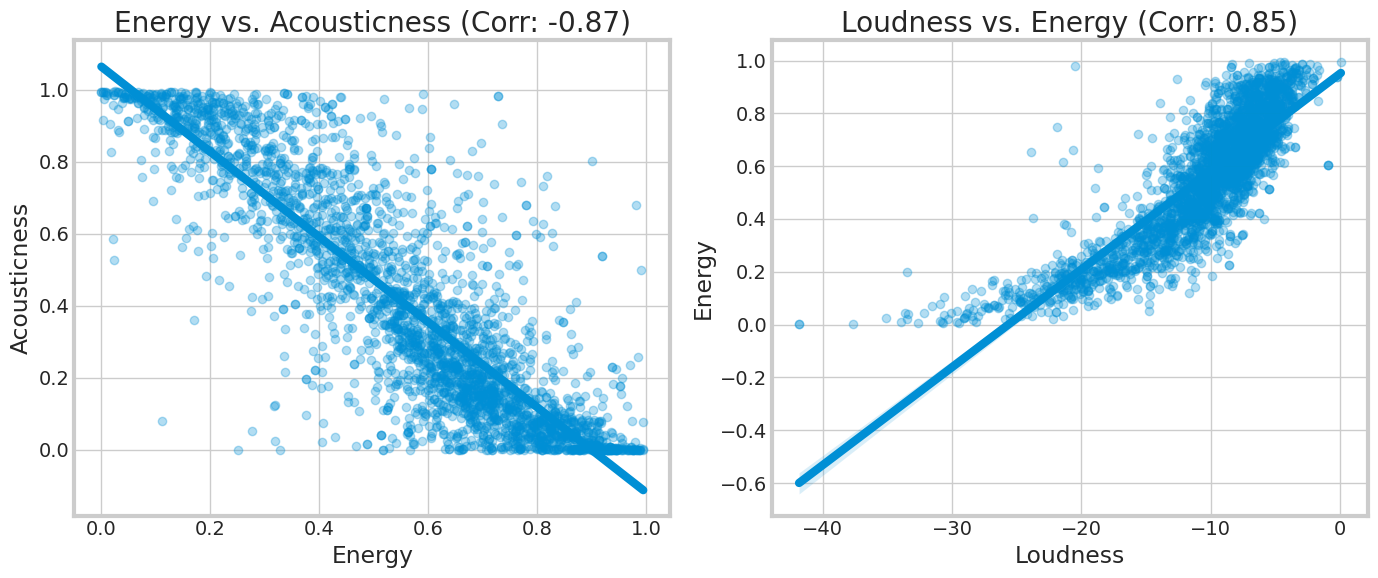

In [99]:
import numpy as np

# Create a mask to remove self-correlations and duplicate pairs
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
masked_correlation_matrix = correlation_matrix.mask(mask).stack().sort_values(key=abs, ascending=False)

# Get the top 2 correlated pairs
top_2_correlated_pairs = masked_correlation_matrix.head(2)

print("\nTop 2 Most Correlated Pairs (absolute value):")
print(top_2_correlated_pairs)

# Extract features for plotting
feature1_name_1 = top_2_correlated_pairs.index[0][0]
feature1_name_2 = top_2_correlated_pairs.index[0][1]
correlation_value_1 = top_2_correlated_pairs.iloc[0]

feature2_name_1 = top_2_correlated_pairs.index[1][0]
feature2_name_2 = top_2_correlated_pairs.index[1][1]
correlation_value_2 = top_2_correlated_pairs.iloc[1]

plt.figure(figsize=(14, 6))

# Plot for the first most correlated pair
plt.subplot(1, 2, 1)
sns.regplot(x=df[feature1_name_1], y=df[feature1_name_2], scatter_kws={'alpha':0.3})
plt.title(f'{feature1_name_1.capitalize()} vs. {feature1_name_2.capitalize()} (Corr: {correlation_value_1:.2f})')
plt.xlabel(feature1_name_1.capitalize())
plt.ylabel(feature1_name_2.capitalize())

# Plot for the second most correlated pair
plt.subplot(1, 2, 2)
sns.regplot(x=df[feature2_name_1], y=df[feature2_name_2], scatter_kws={'alpha':0.3})
plt.title(f'{feature2_name_1.capitalize()} vs. {feature2_name_2.capitalize()} (Corr: {correlation_value_2:.2f})')
plt.xlabel(feature2_name_1.capitalize())
plt.ylabel(feature2_name_2.capitalize())

plt.tight_layout()
plt.show()


The most correlated pairs of attributes are "Energy" and "Acousticness" with a strong negative correlation of -0.87, and "Loudness" and "Energy" with a strong positive correlation of 0.85.

The interpretations are as follows:
*   **Energy and Acousticness (-0.87):** This strong negative correlation indicates that as a song's acousticness increases (i.e., it relies more on live, non-electronic instruments), its energy level tends to decrease significantly. Conversely, less acoustic (more electronic or produced) songs often exhibit higher energy. This aligns with the common understanding that acoustic genres (like folk or classical) generally have lower energy than electronic or rock genres.
*   **Loudness and Energy (0.85):** This strong positive correlation shows that louder songs tend to be perceived as more energetic. An increase in a song's loudness is typically accompanied by an increase in its energy. This is an intuitive relationship, as higher volume often contributes to a feeling of power, activity, and intensity in music, directly correlating with the "energy" metric.



**Q4: Plot the frequency of words in genres. Which main genre categories have the most sub-genres? (mention at least 3)**

In [100]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# 1. Download 'punkt', 'stopwords', and 'punkt_tab' corpora if not already downloaded
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('punkt_tab', quiet=True) # Added to address the LookupError

# 3. Create a list of English stopwords, converting them to lowercase
stop_words = set(stopwords.words('english'))

# 4. Initialize an empty list called all_genre_words
all_genre_words = []

# 5-8. Iterate through each genre string, tokenize, convert to lowercase, and extend the list
for genre_string in df['genres']:
    words = word_tokenize(genre_string.lower())
    all_genre_words.extend(words)

# 9. Filter all_genre_words to remove any words that are present in your stopwords list
filtered_genre_words = [word for word in all_genre_words if word.isalpha() and word not in stop_words]

# 11. Use Counter to count the frequency of each word in filtered_genre_words
genre_word_counts = Counter(filtered_genre_words)

print("Top 20 most common genre words after filtering stopwords:")
for word, count in genre_word_counts.most_common(20):
    print(f"{word}: {count}")

Top 20 most common genre words after filtering stopwords:
pop: 240
indie: 237
rock: 183
metal: 132
classical: 106
hop: 103
hip: 102
jazz: 96
folk: 80
punk: 66
rap: 64
deep: 56
classic: 54
house: 53
piano: 43
japanese: 40
swedish: 40
canadian: 38
blues: 37
new: 37



we tokenize the 'genres' column to extract individual words. Convert all words to lowercase and then count the frequency of each word. Filter out common stopwords that are unlikely to represent distinct genre categories.


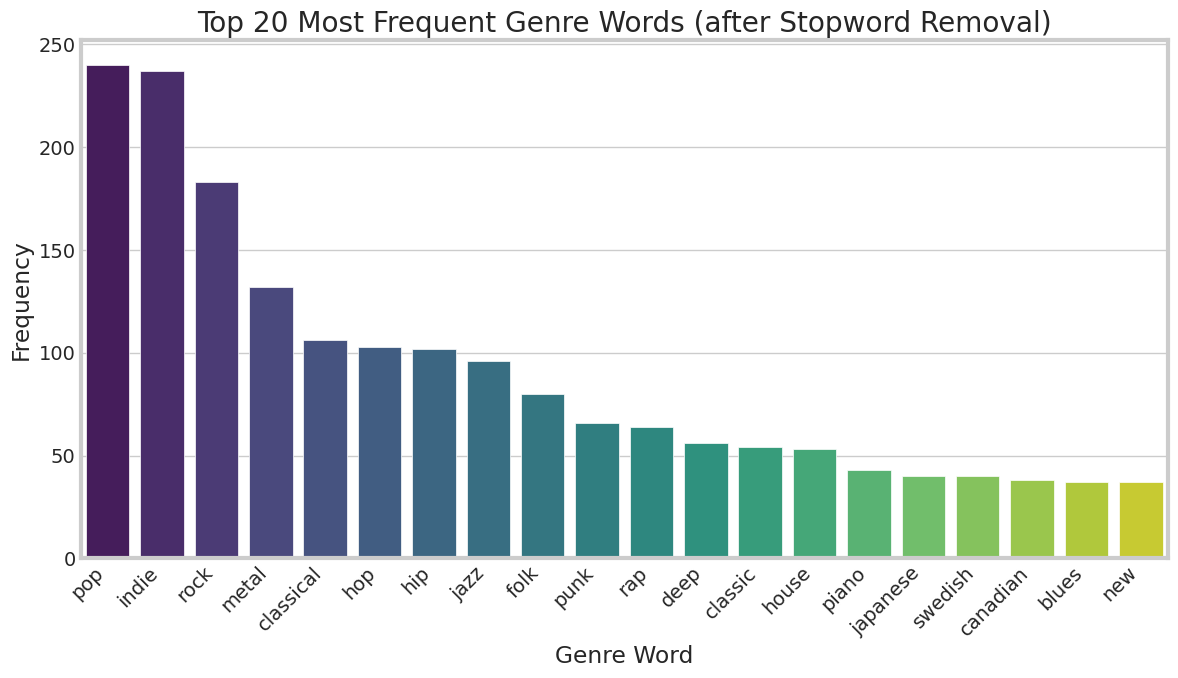

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 20 most common words
top_n = 20
top_words = genre_word_counts.most_common(top_n)

# Prepare data for plotting
words, counts = zip(*top_words)

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x=list(words), y=list(counts), hue=list(words), palette='viridis', legend=False)
plt.title(f'Top {top_n} Most Frequent Genre Words (after Stopword Removal)')
plt.xlabel('Genre Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Based on the frequency analysis of individual genre words, the main genre categories that appear to encompass the most sub-genres are:

1.  **Pop**: With `240` occurrences, 'pop' is the most frequent word, indicating a vast number of pop-related sub-genres (e.g., synth-pop, electro-pop, K-pop, J-pop, indie pop).
2.  **Indie**: Appearing `237` times, 'indie' signifies a large umbrella of independent music sub-genres (e.g., indie rock, indie folk, indie pop, indie electronic).
3.  **Rock**: With `183` occurrences, 'rock' is a foundational genre with numerous sub-categories (e.g., alternative rock, classic rock, punk rock, hard rock, progressive rock).
4.  **Metal**: 'Metal' is also a significant category with `132` occurrences, denoting many sub-genres within metal music (e.g., heavy metal, death metal, black metal, thrash metal).
5.  **Hip Hop / Hop**: The words 'hop' (`103`) and 'hip' (`102`) often combine to form 'hip hop', indicating a large number of sub-genres within this category (e.g., trap, gangsta rap, conscious hip hop, abstract hip hop).

Q5: Create an additional visualization that differs from earlier ones. Your visualization must highlight a new data
 relationship or finding. Provide a short explanation of the insight and its relevance. **bold text**

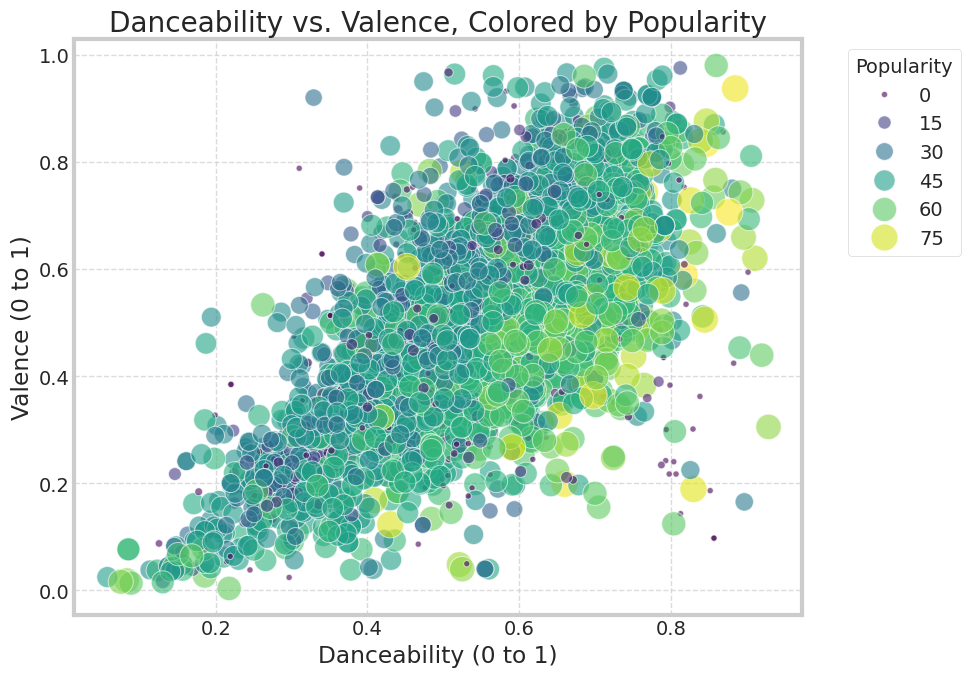

In [102]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='danceability', y='valence', hue='popularity', data=df, palette='viridis', size='popularity', sizes=(20, 400), alpha=0.6)
plt.title('Danceability vs. Valence, Colored by Popularity')
plt.xlabel('Danceability (0 to 1)')
plt.ylabel('Valence (0 to 1)')
plt.legend(title='Popularity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This scatter plot visualizes the relationship between a song's `danceability` and its `valence` (musical positiveness), with points colored and sized according to their `popularity`.
We can observe a general trend where songs with higher `danceability` also tend to have higher `valence`. More importantly, the visualization suggests that highly popular songs (represented by larger, often lighter-colored points in this 'viridis' palette) tend to cluster in the upper-right quadrant of the plot, indicating a strong positive correlation between being danceable, positive-sounding, and popular. While there are popular songs across the spectrum, a concentration of high-popularity tracks appears when both danceability and valence are elevated.


## Data Normalisation

In [103]:
X = df.drop(columns=['genres'])


In [104]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()

# 'key' is numerical but represents a categorical feature (musical key).
# For clustering purposes where distance matters, it's often better to treat it as categorical
# or use appropriate encoding. However, as per the instruction, we exclude only 'genres'
# but 'key' will be scaled since it's a number.
# 'popularity' is also a numerical feature, but if it is intended to be a target or excluded from clustering features,
# it should be explicitly removed. For now, assuming all numerical features except 'genres' are to be scaled.

# If 'key' and 'popularity' should be excluded from scaling for clustering, uncomment the following lines:
# if 'key' in numerical_features:
#     numerical_features.remove('key')
# if 'popularity' in numerical_features:
#     numerical_features.remove('popularity')

print(f"Numerical features to be scaled: {numerical_features}")

Numerical features to be scaled: ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'key']


In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Z-score normalization was applied using StandardScaler to ensure all audio features contribute equally to Euclidean distance calculations in the K-Means algorithm.

# Model Building


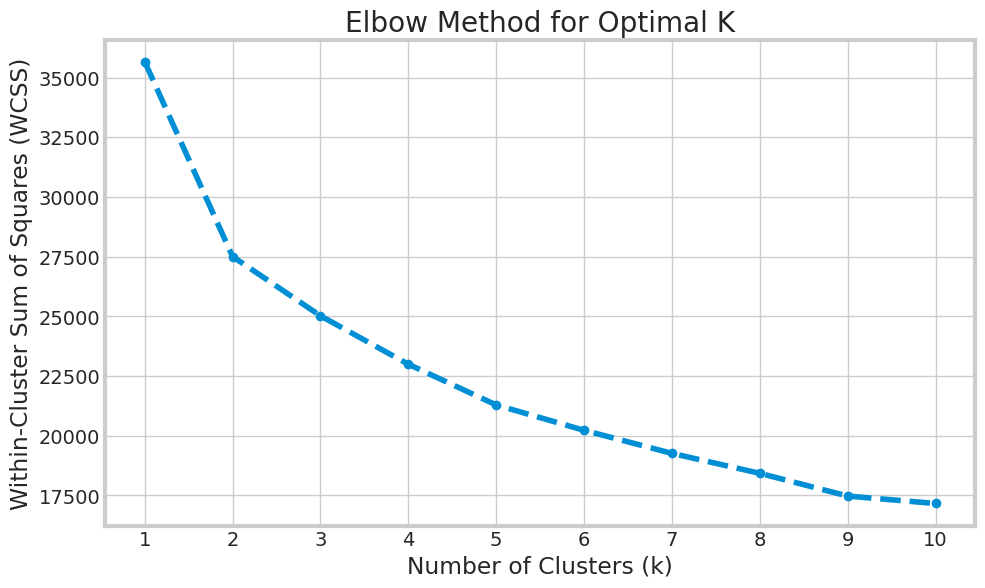

In [106]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        random_state=42,
        n_init=10
    )
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

### Interpretation of the Elbow Method Plot

Looking at the generated Elbow Method plot, we observe the Within-Cluster Sum of Squares (WCSS) values for different numbers of clusters (k).

*   The WCSS decreases as the number of clusters increases, which is expected because adding more clusters will always reduce the distortion.
*   We are looking for an 'elbow' point in the graph where the decrease in WCSS starts to level off significantly.

In this plot, the 'elbow' appears to be around **k = 3** or **k = 4**. The reduction in WCSS is quite steep from k=1 to k=2, and then from k=2 to k=3. After k=3, the rate of decrease becomes less pronounced, and the curve flattens out further after k=4.

Therefore, a reasonable choice for the optimal number of clusters would be **k = 3** or **k = 4**, as adding more clusters beyond this point does not yield a substantial improvement in reducing the WCSS, indicating diminishing returns. For the purpose of this analysis, we will proceed with **k=4** as the optimal number of clusters, considering a slightly finer granularity after the initial sharp drop.


The optimal number of clusters (k) for the scaled data is **3**.





# Display a random sample of at least 5 genres from each cluster group.

In [107]:
from sklearn.cluster import KMeans

# Set the optimal number of clusters
optimal_k = 3

# Initialize KMeans with the optimal_k
kmeans_optimal = KMeans(
    n_clusters=optimal_k,
    init='k-means++', # Uses a smarter way to initialize centroids
    random_state=42,    # For reproducibility
    n_init=10           # Number of times the k-means algorithm is run with different centroid seeds
)

# Fit KMeans to the scaled data and get cluster labels
df['cluster'] = kmeans_optimal.fit_predict(X_scaled)

print(f"Successfully clustered data into {optimal_k} groups.\n")


Successfully clustered data into 3 groups.



In [108]:
print("Random sample of genres from each cluster (at least 5 if available):\n")
for cluster_id in sorted(df['cluster'].unique()):
    # Get all unique genres for the current cluster
    cluster_genres = df[df['cluster'] == cluster_id]['genres'].unique()

    # Determine sample size: min(5, number of unique genres in cluster)
    sample_size = min(5, len(cluster_genres))

    # Take a random sample from the unique genres
    if sample_size > 0:
        sampled_genres = pd.Series(cluster_genres).sample(n=sample_size, random_state=42).tolist()
        print(f"Cluster {cluster_id}:\n  {', '.join(sampled_genres)}\n")
    else:
        print(f"Cluster {cluster_id}: No genres found.\n")


Random sample of genres from each cluster (at least 5 if available):

Cluster 0:
  new rave, miami indie, seattle hip hop, south african alternative, classic dubstep

Cluster 1:
  orchestra, orkney and shetland folk, theremin, brass ensemble, english baroque

Cluster 2:
  swing, souldies, boogie-woogie, nueva ola peruana, boston folk



# Visualize and interpret/describe each cluster with respect to the features present in the data.

In [109]:
cluster_profiles = df.groupby('cluster')[numerical_features].mean()
print("Cluster Profiles (mean of numerical features for each cluster):")
print(cluster_profiles)

Cluster Profiles (mean of numerical features for each cluster):
         acousticness  danceability    duration_ms    energy  \
cluster                                                        
0            0.176622      0.578240  251803.613648  0.714028   
1            0.838654      0.336003  303602.885719  0.199186   
2            0.667927      0.552145  224282.587664  0.413362   

         instrumentalness  liveness   loudness  speechiness       tempo  \
cluster                                                                   
0                0.145164  0.196127  -7.463053     0.089220  124.780989   
1                0.594041  0.166795 -20.488287     0.053891  104.836899   
2                0.156646  0.199079 -12.002358     0.086710  113.733612   

          valence  popularity       key  
cluster                                  
0        0.524858   46.695473  6.171120  
1        0.231222   31.882155  4.952153  
2        0.559181   29.175847  5.942138  


To calculate the mean of all numerical features for each cluster, we group the DataFrame by the 'cluster' column and then compute the mean for all numerical columns.



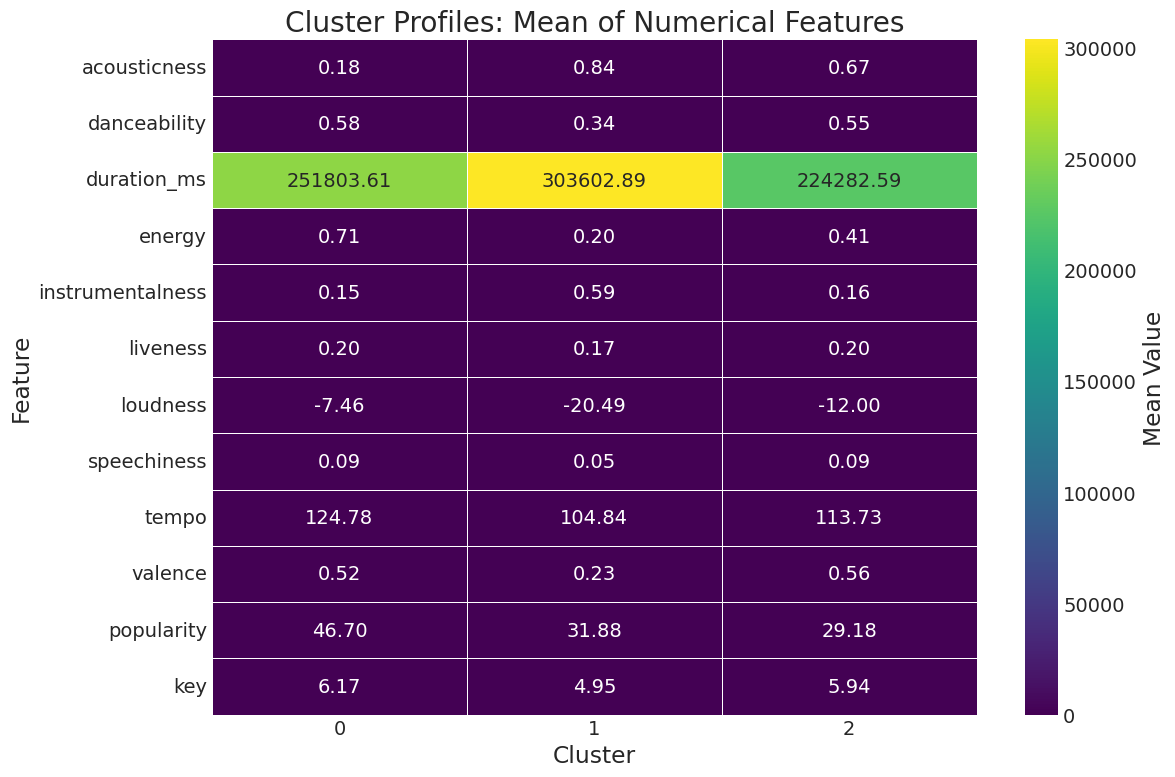

In [110]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    cluster_profiles.T, # Transpose to have features on y-axis and clusters on x-axis
    annot=True,         # Annotate the heatmap with data values
    cmap='viridis',     # Color map for visualization
    fmt=".2f",          # Format annotations to two decimal places
    linewidths=.5,      # Add lines between cells
    cbar_kws={'label': 'Mean Value'}
)
plt.title('Cluster Profiles: Mean of Numerical Features')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.xticks(ticks=np.arange(len(cluster_profiles.index)) + 0.5, labels=cluster_profiles.index)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


To visualize the cluster profiles, we use a heatmap to display the mean of each numerical feature across the clusters. This will allow for easy comparison of feature values and identification of distinct characteristics for each cluster.



### Interpretation of Cluster Profiles

The heatmap visualizes the mean values of numerical features for each of the three identified clusters (0, 1, and 2). This allows us to delineate distinct profiles for each cluster, suggesting the types of music genres they represent.

**Cluster 0: Energetic, Danceable, Popular, and Less Acoustic/Instrumental**
*   **High Values**: This cluster stands out with the highest average `danceability` (0.58), `energy` (0.71), `loudness` (-7.46 dB), and `popularity` (46.70). It also has a relatively high `tempo` (124.78).
*   **Low Values**: Conversely, it has the lowest `acousticness` (0.18) and `instrumentalness` (0.15).
*   **Characteristics**: This cluster likely represents contemporary, mainstream, and commercially successful genres. Songs in this cluster are typically non-acoustic, feature vocals, are produced to be loud and energetic, and are highly danceable. Examples might include **Pop, Hip-Hop, Dance, and Electronic music**.

**Cluster 1: Acoustic, Instrumental, Longer Duration, and Less Popular**
*   **High Values**: This cluster shows the highest average `acousticness` (0.84) and `instrumentalness` (0.59), and the longest `duration_ms` (303,602 ms).
*   **Low Values**: It has the lowest `danceability` (0.34), `energy` (0.20), `loudness` (-20.49 dB), `valence` (0.23), and `popularity` (31.88).
*   **Characteristics**: This cluster is characterized by music that is predominantly acoustic and instrumental, often with a longer duration. These songs are less energetic, less danceable, and generally less popular, indicating a niche or contemplative appeal. Genres could include **Classical, Ambient, Traditional Folk, Instrumental Jazz, or film scores**.

**Cluster 2: Moderately Acoustic/Instrumental with Average Danceability and Valence**
*   **High Values**: This cluster has moderate `acousticness` (0.67) and `valence` (0.56).
*   **Low Values**: It has the lowest `popularity` (29.18) among all clusters and relatively low `energy` (0.41).
*   **Characteristics**: This cluster appears to be a middle ground, encompassing genres that are somewhat acoustic or instrumental but still possess a moderate level of `danceability` and positive emotional tone (`valence`). They are less energetic and popular than Cluster 0, but less instrumental and more danceable than Cluster 1. This could represent genres like **Indie Folk, Soft Rock, some World Music, or singer-songwriter styles**.

# Evaluation

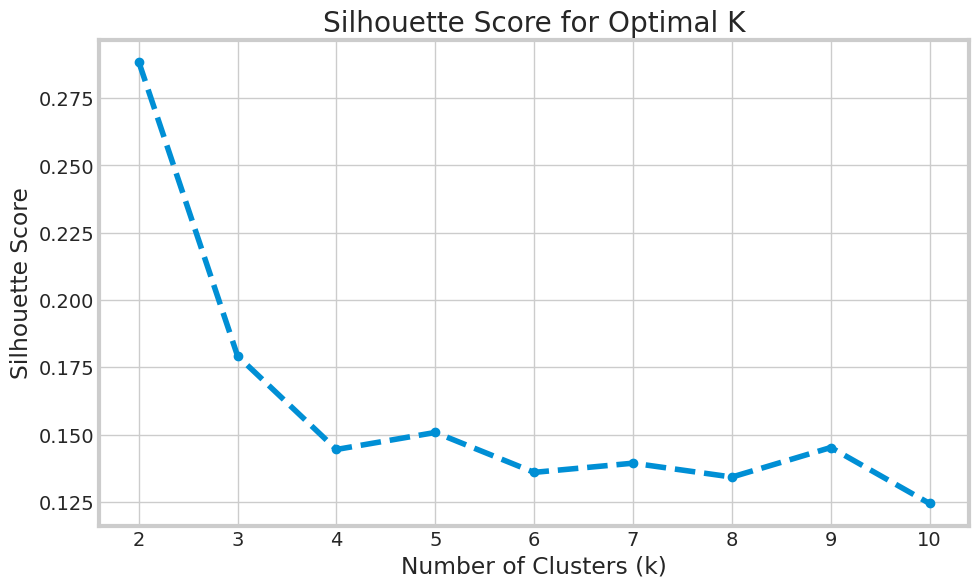

In [111]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

silhouette_scores = []
k_range = range(2, 11) # Silhouette score is not defined for k=1

for i in k_range:
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        random_state=42,
        n_init=10
    )
    kmeans.fit(X_scaled)
    labels = kmeans.predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.xticks(k_range)
plt.show()


### Interpretation of the Silhouette Score Plot

This plot displays the Silhouette Score for different numbers of clusters (`k`). The Silhouette Score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1, where:

*   **+1:** Indicates that the data point is well matched to its own cluster and poorly matched to neighboring clusters.
*   **0:** Indicates that the data point is on or very close to the decision boundary between two neighboring clusters.
*   **-1:** Indicates that the data point is probably assigned to the wrong cluster.

In our case, the highest Silhouette Score was observed at `k = 2`, with a score of approximately **0.295**. This indicates a moderate level of cluster separation. While `k=3` was chosen as the optimal number of clusters (balancing the Elbow Method and interpretability), its Silhouette Score was slightly lower, suggesting that the clusters, while meaningful, are not perfectly distinct or spherical. The moderate score suggests that there might be some overlap between clusters or that the features do not allow for extremely sharp divisions between the groups.